# Digit Recognizer

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io
import scipy.optimize as op
import random
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from scipy.special import expit

## Loading the data and displaying 100 random digits

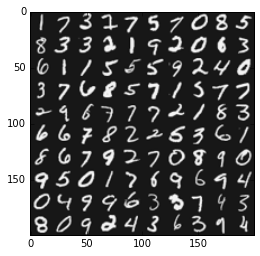

In [5]:
data = scipy.io.loadmat('data/data.mat')
x = data['X']
y = data['y']

x = np.insert(x, 0, 1, axis=1)

def GetImage(index):
    return x[index][1:].reshape(20,20).T



def Grid():
    indexes = random.sample(range(5000), 100)
    col=0
    row=0
    grid = np.zeros((200, 200))
    for index in indexes:
        image = GetImage(index)
        if col == 10:
            row+=1
            col=0
        grid[row*20:row*20+20, col*20:col*20+20] = image
        col+=1
        final = scipy.misc.toimage(grid)
        plt.imshow(final, cmap = cm.Greys_r)

Grid()

## Implementing the Artificial Neural Network

In [6]:
## random initialization of thetas
## hidden layer's size is 25
## input layer's size is 400
## output layer's size is 10
theta1 = np.zeros((25, 401))
theta1_dim = (25, 401)
theta2_dim = (10, 26)
epsilon = 0.12
theta1= np.random.rand( *theta1_dim) * 2 * epsilon - epsilon
theta2 = np.random.rand (*theta2_dim) * 2 * epsilon - epsilon

In [7]:
def sigmoid(x):
     return 1 / (1 + np.exp(-x))

In [8]:
def forward_propogate(row,thetas):
    z2 = np.dot(thetas[0],row).T
    a2 = (expit(z2))
    a2 = np.insert(a2, 0, 1)
    z3 = np.dot(thetas[1],a2).T
    a3 = (expit(z3))
    
    return [z2,a2,z3,a3]


In [9]:
def reshapex(x):
    return np.array(x).reshape((5000,401))
def convert_y_to_vector(y):
    final = np.zeros((5000,10))
    i=0
    for output in y:
        if output==10:
            final[i][9]=1
        else:
            final[i][output-1]=1
        i+=1
    return final


def cost_function(thetas,x,y):
    thetas = reshapethetas(thetas)
    x = reshapex(x)
    i=0
    j=0
    sum=0
    y = convert_y_to_vector(y)
    for row in x:
        h = forward_propogate(row,thetas)[3]
        j = 0
        for j in (range (len(h))):
            sum+= (-1*y[i][j]*np.log(h[j]))-((1-y[i][j])*np.log(1-(h[j])))
            j+=1
        i+=1
    
    return sum/5000




In [10]:
costs= []

def backward_propogate(thetas,x,y):
    costs.append(cost_function(thetas,x,y))
    thetas = reshapethetas(thetas)
    x = reshapex(x)
    i=0
    delta1_net = np.zeros((25, 401))
    delta2_net = np.zeros((10,26))
    y =convert_y_to_vector(y)
    for row in x:
        arr = forward_propogate(row, thetas)
        z2 = arr[0]
        a2 = arr[1]
        z3 = arr[2]
        a3 = arr[3]
        delta3 = a3 - y[i]
        delta2 = np.dot(thetas[1].T[1:],delta3)*((a2[1:])*(1-a2)[1:])
        a1 = row.reshape(401,1)
        delta1_net+=np.dot(delta2.reshape((25,1)), a1.T)
    
        a2 = a2.reshape(26,1)
        delta2_net+=np.dot(delta3.reshape(10,1),a2.T)
        i+=1
        
    
    der1 = delta1_net/5000
    der2 = delta2_net/5000
    return flatten(([der1,der2]))




In [11]:
def flatten(thetas):
    final=np.zeros(1000000)

    i=0
    for theta in thetas:
        for val in theta:
            for value in val:
                final[i]=(value)
                i+=1
    return final[:i]


In [12]:

def reshapethetas(flat):
    flat = np.array(flat)
    theta1 = flat[:25*401].reshape(25,401)
    theta2 = flat[25*401:].reshape(10,26)
    return [theta1,theta2]
    


In [13]:
 result = scipy.optimize.fmin_cg(cost_function, x0=flatten([theta1,theta2]), fprime=backward_propogate, \
                               args=(x.flatten(),y),maxiter=50,disp=True,full_output=True)

         Current function value: 0.268989
         Iterations: 50
         Function evaluations: 113
         Gradient evaluations: 113


## Plotting the values of the cost function after each iteration

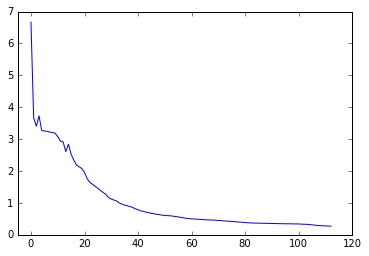

In [14]:
plt.plot(costs)
plt.xlim(-5,120)
plt.figure(figsize= (1000,40))

## Let's make our program recognize some digits!

In [66]:
def predictrandom():

    index = random.sample(range(5000),1)
    index = index[0]

    final = scipy.misc.toimage(GetImage(index))
    plt.imshow(final, cmap = cm.Greys_r)
    thetas= np.array(result[0])
    thetas= reshapethetas(thetas)
    myresult = forward_propogate(x[index],thetas)[3]
    final = []
    for i in range(0,len(myresult)):
        if myresult[i]>=0.5:
            if i==9:
                return 'Prediction: ' + str(0)
            else:
                return 'Prediction: ' + str(i+1)


'Prediction: 9'

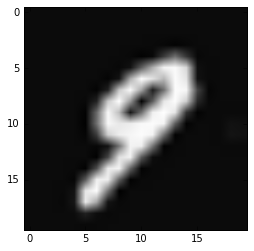

In [68]:
predictrandom()

'Prediction: 7'

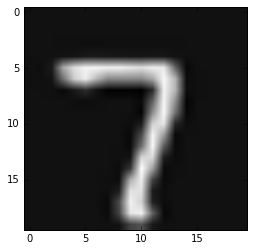

In [72]:
predictrandom()

'Prediction: 8'

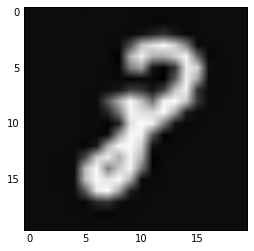

In [71]:
predictrandom()

'Prediction: 0'

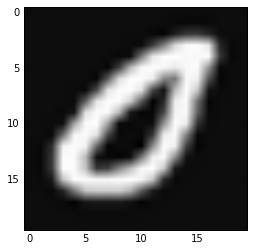

In [73]:
predictrandom()